In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [52]:
path = "./train_concept.csv"

In [53]:
df = pd.read_csv(path)
df

,input,target,time_difference,duration_difference,group_size_difference
0,1234,5746,30558.0,25018.0,29.0
1,5746,1234,30558.0,25018.0,29.0
2,1234,5747,35456.0,29066.0,30.0
3,5747,1234,35456.0,29066.0,30.0
4,5746,5747,4898.0,4048.0,1.0
...,...,...,...,...,...
3882443,28332,125326,2085.0,21.0,2.0
3882444,125326,21297,4485.0,819.0,1.0
3882445,21297,125326,4485.0,819.0,1.0
3882446,28332,21297,2400.0,840.0,1.0


In [54]:
def exponential_decay(const, rate, x):
    return const * np.e**(-rate*x)

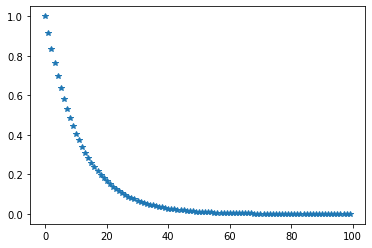

In [55]:
plt.plot(list(range(100)), [exponential_decay(1, 0.09, x) for x in range(100)], '*')
plt.show()

In [56]:
exponential_decay(1, 0.09, 20000)

0.0

In [57]:
time_const = 1
time_rate = 0.0009

def transform_time(time):
    return exponential_decay(time_const, time_rate, time)

In [58]:
tqdm.pandas()
df["time_difference"] = df["time_difference"].progress_apply(transform_time)

100%|██████████| 3882448/3882448 [00:06<00:00, 571787.32it/s]


In [59]:
values = list(df["time_difference"])

In [60]:
from collections import Counter

In [61]:
cnt = Counter(values)

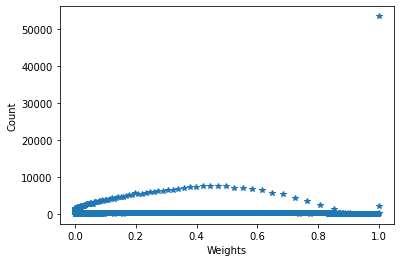

In [62]:
plt.plot(list(cnt.keys()), list(cnt.values()), "*")
plt.xlabel("Weights")
plt.ylabel("Count")
plt.savefig("./td_weights.jpg")
plt.show()

In [63]:
df["duration_difference"] = df["duration_difference"].progress_apply(transform_time)

100%|██████████| 3882448/3882448 [00:07<00:00, 534806.49it/s]


In [64]:
values = list(df["duration_difference"])

In [65]:
cnt = Counter(values)

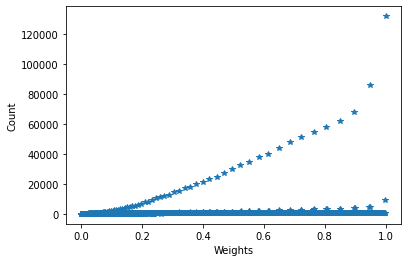

In [66]:
plt.plot(list(cnt.keys()), list(cnt.values()), "*")
plt.xlabel("Weights")
plt.ylabel("Count")
plt.savefig("./dd_weights.jpg")
plt.show()

In [67]:
time_const = 1
time_rate = 0.09

def transform_group(time):
    return exponential_decay(time_const, time_rate, time)

df["group_size_difference"] = df["group_size_difference"].progress_apply(transform_group)

100%|██████████| 3882448/3882448 [00:07<00:00, 530723.39it/s]


In [68]:
values = list(df["group_size_difference"])

In [69]:
cnt = Counter(values)

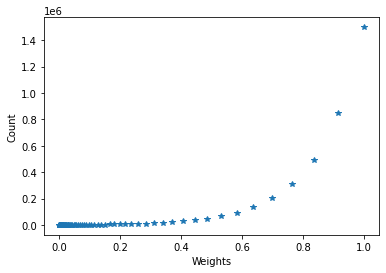

In [70]:
plt.plot(list(cnt.keys()), list(cnt.values()), "*")
plt.xlabel("Weights")
plt.ylabel("Count")
plt.savefig("./gs_weights.jpg")
plt.show()

In [150]:
exponential_decay(1, 0.09, 20)

0.1652988882215866

In [153]:
df["weight"] = (df["time_difference"] + df["duration_difference"] + df["group_size_difference"]) / 3
df

,input,target,time_difference,duration_difference,group_size_difference,weight
0,1234,5746,1.137487e-12,1.664710e-10,0.073535,0.024512
1,5746,1234,1.137487e-12,1.664710e-10,0.073535,0.024512
2,1234,5747,1.385126e-14,4.356291e-12,0.067206,0.022402
3,5747,1234,1.385126e-14,4.356291e-12,0.067206,0.022402
4,5746,5747,1.217708e-02,2.616847e-02,0.913931,0.317426
...,...,...,...,...,...,...
3882443,28332,125326,1.531251e-01,9.812775e-01,0.835270,0.656558
3882444,125326,21297,1.765917e-02,4.784996e-01,0.913931,0.470030
3882445,21297,125326,1.765917e-02,4.784996e-01,0.913931,0.470030
3882446,28332,21297,1.153251e-01,4.695408e-01,0.913931,0.499599


In [154]:
df.to_csv("./train_concept_processed.csv", index=False)

In [161]:
df

,input,target,time_difference,duration_difference,group_size_difference,weight
0,1234,5746,1.137487e-12,1.664710e-10,0.073535,0.024512
1,5746,1234,1.137487e-12,1.664710e-10,0.073535,0.024512
2,1234,5747,1.385126e-14,4.356291e-12,0.067206,0.022402
3,5747,1234,1.385126e-14,4.356291e-12,0.067206,0.022402
4,5746,5747,1.217708e-02,2.616847e-02,0.913931,0.317426
...,...,...,...,...,...,...
3882443,28332,125326,1.531251e-01,9.812775e-01,0.835270,0.656558
3882444,125326,21297,1.765917e-02,4.784996e-01,0.913931,0.470030
3882445,21297,125326,1.765917e-02,4.784996e-01,0.913931,0.470030
3882446,28332,21297,1.153251e-01,4.695408e-01,0.913931,0.499599


In [165]:
df1 = df.copy(deep=True)
df1 = df1.drop(["time_difference", "duration_difference", "group_size_difference"], axis=1)
df1

,input,target,weight
0,1234,5746,0.024512
1,5746,1234,0.024512
2,1234,5747,0.022402
3,5747,1234,0.022402
4,5746,5747,0.317426
...,...,...,...
3882443,28332,125326,0.656558
3882444,125326,21297,0.470030
3882445,21297,125326,0.470030
3882446,28332,21297,0.499599


In [174]:
data = df1.to_numpy()
final_df = pd.DataFrame(data)

In [178]:
final_df[0] = final_df[0].astype(int)
final_df[1] = final_df[1].astype(int)
final_df

,0,1,2
0,1234,5746,0.024512
1,5746,1234,0.024512
2,1234,5747,0.022402
3,5747,1234,0.022402
4,5746,5747,0.317426
...,...,...,...
3882443,28332,125326,0.656558
3882444,125326,21297,0.470030
3882445,21297,125326,0.470030
3882446,28332,21297,0.499599


In [179]:
train_file = open("./train_concept_final.csv", 'w')
final_df.to_csv(train_file, header=False, index=False)
train_file.close()

In [180]:
path = "../actions_1.csv"

In [181]:
df1 = pd.read_csv(path)

In [184]:
groups = df1.groupby("id")

In [185]:
min_num = 1000
max_num = 0

for i, group in groups:
    if len(group) > max_num:
        max_num = len(group)
    
    if len(group) < min_num:
        min_num = len(group)
min_num, max_num

(1, 38)

In [186]:
df1

,id,datetime,concept,duration,groupSize,contact
0,21,122385.0,sec_490124,2452,1,False
1,21,125232.0,sec_425380,1405,1,False
2,21,127214.0,home_5,12023,1,False
3,21,139380.0,PT!100110007:7!120200199-1_202458!120062097-1_...,480,2,True
4,21,140160.0,PT!100100180:180!120178341-1_235191!120178340-...,899,1,False
...,...,...,...,...,...,...
558855,11757462,148816.0,sec_422532,4287,1,False
558856,11757462,154860.0,PT!059440045:45!120582766-1_81480!120582367-1_...,840,2,True
558857,11757462,155999.0,sec_379487,0,1,False
558858,11757462,156300.0,PT!059440045:45!120582766-1_81480!120582399-1_...,300,2,True


In [187]:
len(groups)

108246

In [2]:
path = "../actions_1.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,id,datetime,concept,duration,groupSize,contact
0,21,122385.0,sec_490124,2452,1,False
1,21,125232.0,sec_425380,1405,1,False
2,21,127214.0,home_5,12023,1,False
3,21,139380.0,PT!100110007:7!120200199-1_202458!120062097-1_...,480,2,True
4,21,140160.0,PT!100100180:180!120178341-1_235191!120178340-...,899,1,False
...,...,...,...,...,...,...
558855,11757462,148816.0,sec_422532,4287,1,False
558856,11757462,154860.0,PT!059440045:45!120582766-1_81480!120582367-1_...,840,2,True
558857,11757462,155999.0,sec_379487,0,1,False
558858,11757462,156300.0,PT!059440045:45!120582766-1_81480!120582399-1_...,300,2,True


In [5]:
path_tc = "./train_concept_processed.csv"
path_tf = "./train_concept_final.csv"

In [6]:
df1 = pd.read_csv(path_tc)
df1

,input,target,time_difference,duration_difference,group_size_difference,weight
0,1234,5746,1.137487e-12,1.664710e-10,0.073535,0.024512
1,5746,1234,1.137487e-12,1.664710e-10,0.073535,0.024512
2,1234,5747,1.385126e-14,4.356291e-12,0.067206,0.022402
3,5747,1234,1.385126e-14,4.356291e-12,0.067206,0.022402
4,5746,5747,1.217708e-02,2.616847e-02,0.913931,0.317426
...,...,...,...,...,...,...
3882443,28332,125326,1.531251e-01,9.812775e-01,0.835270,0.656558
3882444,125326,21297,1.765917e-02,4.784996e-01,0.913931,0.470030
3882445,21297,125326,1.765917e-02,4.784996e-01,0.913931,0.470030
3882446,28332,21297,1.153251e-01,4.695408e-01,0.913931,0.499599


In [7]:
df2 = pd.read_csv(path_tf)

In [8]:
df2

,1234,5746,0.024511514643555197
0,5746,1234,0.024512
1,1234,5747,0.022402
2,5747,1234,0.022402
3,5746,5747,0.317426
4,5747,5746,0.317426
...,...,...,...
3882442,28332,125326,0.656558
3882443,125326,21297,0.470030
3882444,21297,125326,0.470030
3882445,28332,21297,0.499599


In [9]:
path_original = "./train_concept.csv"
df3 = pd.read_csv(path_original)
df3

,input,target,time_difference,duration_difference,group_size_difference
0,1234,5746,30558.0,25018.0,29.0
1,5746,1234,30558.0,25018.0,29.0
2,1234,5747,35456.0,29066.0,30.0
3,5747,1234,35456.0,29066.0,30.0
4,5746,5747,4898.0,4048.0,1.0
...,...,...,...,...,...
3882443,28332,125326,2085.0,21.0,2.0
3882444,125326,21297,4485.0,819.0,1.0
3882445,21297,125326,4485.0,819.0,1.0
3882446,28332,21297,2400.0,840.0,1.0


In [17]:
import pickle as pkl
with open("../embeddings.pkl", "rb") as handle:
    embeddings = pkl.load(handle)

In [28]:
embeddings["final_embeddings"][10], embeddings["reverse_vocab"][10]

(array([ 0.00869311,  0.00175423,  0.00111339, -0.00389404,  0.00586685,
         0.00186524,  0.00431608, -0.00456577, -0.00350027, -0.00458347,
         0.00864205, -0.00988892,  0.00113492, -0.00360259, -0.00991831,
         0.00817798,  0.00651336,  0.00133357, -0.00317862, -0.00034754,
         0.00577784,  0.0020607 , -0.00204408, -0.00746763, -0.00801533,
         0.00624641,  0.00118101, -0.00510817,  0.00524419, -0.00441254,
        -0.00643446,  0.00357913,  0.00322346, -0.0018531 ,  0.0066474 ,
        -0.0070343 ,  0.00237885,  0.00807339,  0.0032728 , -0.00720521,
         0.00310752, -0.0061626 , -0.00431432,  0.00970339,  0.00916736,
        -0.00241043,  0.00707719, -0.00628927, -0.00778897, -0.00682717],
       dtype=float32),
 'home_153')

2532000